In [25]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [26]:
df = pd.read_csv('Wprld population growth rate by cities 2024.csv')
print(df.head())

        City     Country      Continent  Population (2024)  Population (2023)  \
0      Tokyo       Japan           Asia           37115035           37194105   
1      Delhi       India           Asia           33807403           32941309   
2   Shanghai       China           Asia           29867918           29210808   
3      Dhaka  Bangladesh           Asia           23935652           23209616   
4  Sao Paulo      Brazil  South America           22806704           22619736   

   Growth Rate  
0      -0.0021  
1       0.0263  
2       0.0225  
3       0.0313  
4       0.0083  


In [27]:
grouped_df = df.groupby(by= ['Country', 'City'])
total_pop = grouped_df["Population (2024)"].agg(["min", "max", "mean"])
print(total_pop)

                          min      max       mean
Country     City                                 
Afghanistan Kabul     4728384  4728384  4728384.0
Algeria     Algiers   2952115  2952115  2952115.0
            Oran       950768   950768   950768.0
Angola      Benguela   843207   843207   843207.0
            Cabinda    947634   947634   947634.0
...                       ...      ...        ...
Yemen       Sanaa     3407814  3407814  3407814.0
            Taiz       974518   974518   974518.0
Zambia      Kitwe      792350   792350   792350.0
            Lusaka    3324219  3324219  3324219.0
Zimbabwe    Harare    1603201  1603201  1603201.0

[800 rows x 3 columns]


In [28]:
df.columns

Index(['City', 'Country', 'Continent', 'Population (2024)',
       'Population (2023)', 'Growth Rate'],
      dtype='object')

In [29]:
aggregated_data = df.groupby("Country").agg(
	Average_Growth=('Growth Rate', 'mean'),
	total_cities=('Population (2024)', 'count'),
	Max_Population=('Population (2024)', 'max'),
	Min_Population=('Population (2024)', 'min')
)
print(aggregated_data)

             Average_Growth  total_cities  Max_Population  Min_Population
Country                                                                  
Afghanistan        0.030400             1         4728384         4728384
Algeria            0.016550             2         2952115          950768
Angola             0.042800             6         9651032          751297
Argentina          0.010800             6        15618288          923715
Armenia            0.002500             1         1097542         1097542
...                     ...           ...             ...             ...
Venezuela          0.012950             8         2991727          775097
Vietnam            0.030717             6         9567656         1142997
Yemen              0.037660             5         3407814          759157
Zambia             0.041700             2         3324219          792350
Zimbabwe           0.015900             1         1603201         1603201

[132 rows x 4 columns]


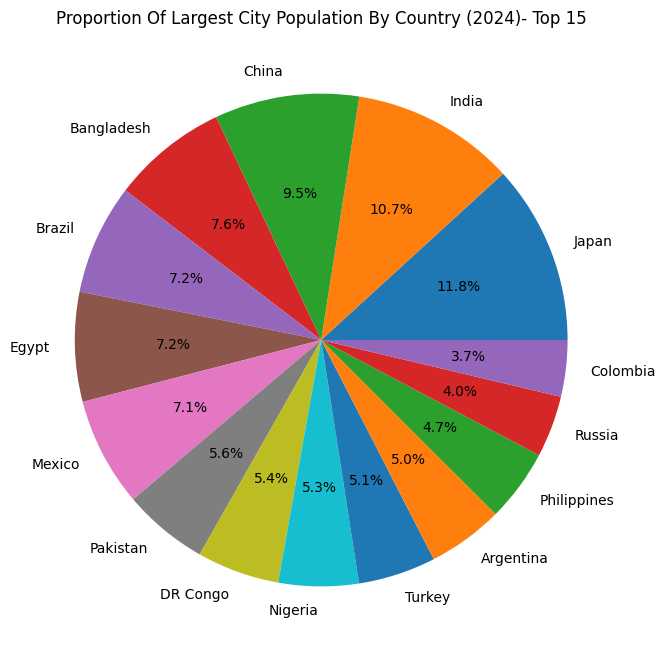

In [30]:
# sort by Max_population and  keep top 15 countries 
top_15 = aggregated_data.sort_values('Max_Population', ascending=False).head(15)

# plot top 15 largest countries 

top_15['Max_Population'].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title("Proportion Of Largest City Population By Country (2024)- Top 15")
plt.ylabel("")
plt.show()